# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# omsky_gamedev

# Предобработка Датасета

## Загружаем DataSet

In [3]:
df = pd.read_csv('neo_task.csv')
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [4]:
df.dtypes

id                    float64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

## Нивелирование анамалий
- Заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму)
- Удаление дубликатов

In [5]:
df = df.drop_duplicates()
df = df.apply(lambda a: a.fillna(a.mean() if a.dtypes ==
              np.float64 else a.median() if a.dtypes == np.int64 else a.mode()[0]))
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [6]:
df.isnull().sum()


id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

## Преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума)

In [7]:
names = dict(df.loc[:, list(filter(lambda a: df[a].dtypes == 'object', df.columns))].apply(lambda a: a.unique()))
names

{'name': 0          (2011 GZ2)
 1          (2020 HT6)
 2        (2016 ED156)
 3          (2013 FD8)
 4         (2016 CW31)
              ...     
 27413      (2018 GD3)
 27414      (2019 PG1)
 27415      (2019 JY4)
 27416     (2005 EN30)
 27417       (2021 YE)
 Name: name, Length: 27418, dtype: object}

In [8]:
def replacer(a):
    return a.map(lambda k: np.where(names[a.name] == k)[0][0]) if a.dtypes == 'object' else a


In [9]:
df = df.apply(lambda a: a.map(lambda k: np.where(names[a.name] == k)[0][0]) if a.dtypes == 'object' else a.map(float))
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0.0
1,54016766.0,1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0.0
2,3746620.0,2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0.0
3,3633054.0,3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0.0
4,3742124.0,4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0.0
...,...,...,...,...,...,...,...,...
90831,54231436.0,27417,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0.0
90832,3824972.0,7577,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0.0
90833,3740101.0,8541,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0.0
90834,3691093.0,19100,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0.0


## Сохранение

In [10]:
df.to_csv('modded_neo_task.csv', index=False)

# Основное задание

## Загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку.

- miss_distance - расстояние промаха
- hazardous - опасность
- relative_velocity - относительная скорость
- absolute_magnitude - абсолютная звёздная величина

### Загрузите датасет для регрессии.

In [3]:
models = pd.read_csv('../Data/modded_neo_task.csv')
models

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0.0
1,54016766.0,1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0.0
2,3746620.0,2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0.0
3,3633054.0,3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0.0
4,3742124.0,4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0.0
...,...,...,...,...,...,...,...,...
90831,54231436.0,27417,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0.0
90832,3824972.0,7577,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0.0
90833,3740101.0,8541,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0.0
90834,3691093.0,19100,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0.0


### Выделите целевой признак и предикторы.

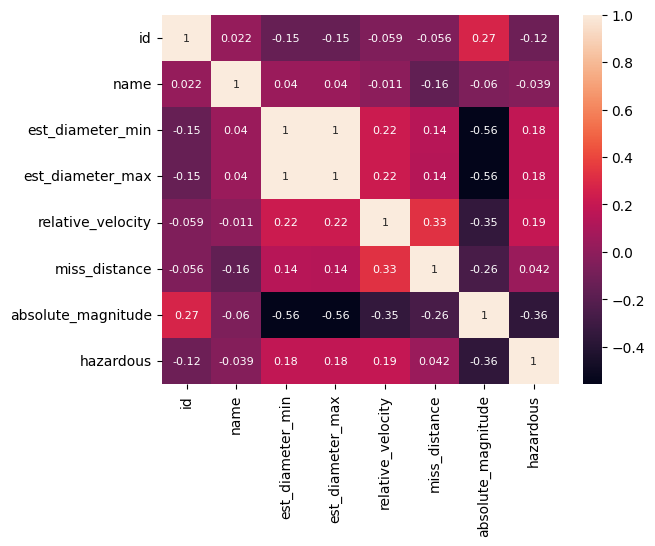

In [12]:
fig = sns.heatmap(models.corr(method='pearson'), annot=True, annot_kws={"fontsize":8}).get_figure()

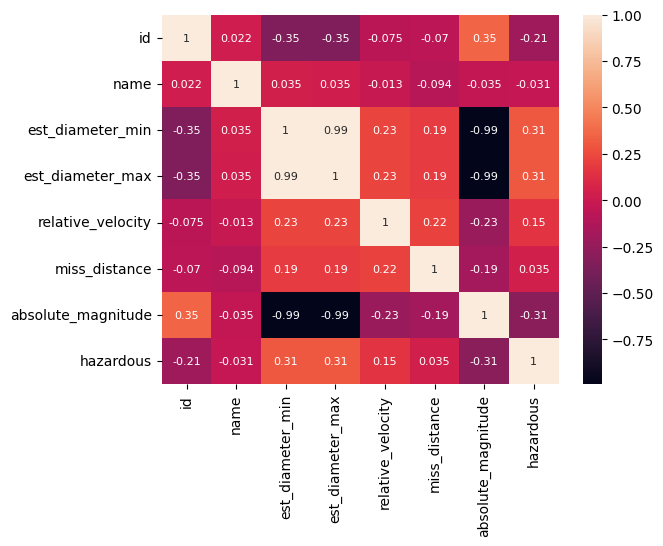

In [13]:
fig = sns.heatmap(models.corr(method='kendall'), annot=True, annot_kws={"fontsize":8}).get_figure()

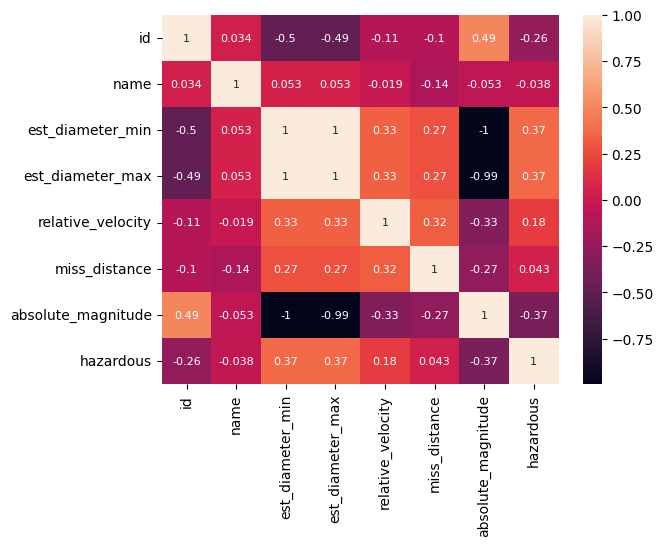

In [14]:
fig = sns.heatmap(models.corr(method='spearman'), annot=True, annot_kws={"fontsize":8}).get_figure()

<b>Вывод</b>:

- Есть сильная (почти линейная) кореляция между минимальным и максимальным диаметром.
- Есть обратная зависимость между абсолютной скоростью и диаметром.
- Существует шанс кореляции стиля и диаметра цилиндра.
- Существует шанс кореляции стиля и цены.

Для задачи регресии хорошо подойдёт поиск промаха:
<br>
- <b>Целевой признак:</b> miss_distance
- <b>Предикторы:</b> est_diameter_min, est_diameter_max, relative_velocity, absolute_magnitude

## Решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;

### Решите задачу регрессии на ваших данных с использованием моделей sklearn.

#### Разбиваем на выборку

In [4]:
X_train, X_test, y_train, y_test = train_test_split(models.drop(['id', 'name', 'miss_distance'], axis=1), models['miss_distance'], test_size=0.2)


#### Обуение

In [5]:
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)

array([68179355.33976513, 31323875.57252757, 35364283.7508026 , ...,
       38410605.55068534, 35679420.98069143, 40309578.62719449])